In [16]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from datetime import datetime 
from collections import defaultdict
from scipy.stats import pearsonr

In [17]:
#create a pandas dataframes from csv files
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [18]:
users.info()
users.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


id                  int64
name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [19]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


id                object
user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

## Trasformazione delle colonne in tipi

In [20]:
tweets['id'] = pd.to_numeric(tweets['id'], errors='coerce')
tweets['user_id'] = pd.to_numeric(tweets['user_id'], errors='coerce')
tweets['retweet_count'] = pd.to_numeric(tweets['retweet_count'], errors='coerce')
tweets['reply_count'] = pd.to_numeric(tweets['reply_count'], errors='coerce')
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets['num_hashtags'] = pd.to_numeric(tweets['num_hashtags'], errors='coerce')
tweets['num_mentions'] = pd.to_numeric(tweets['num_mentions'], errors='coerce')
tweets['num_urls'] = pd.to_numeric(tweets['num_urls'], errors='coerce')
tweets['created_at'] = pd.to_datetime(tweets['created_at'], errors='coerce')

users['id'] = pd.to_numeric(users['id'], errors='coerce')
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

In [21]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

## User analysis 

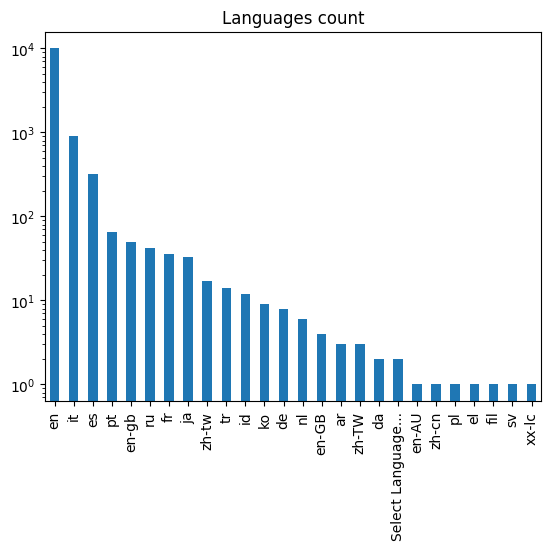

In [22]:
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')
plt.show()

#### Lang Analysis

/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_30807/2716921091.py:10: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  text_nal = tweets.merge(nal, on='user_id')


,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
0,4.912745e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c...",Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
1,4.886930e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
2,4.854109e+17,2.955215e+07,0.0,0.0,0.0,0.0,0.0,0.0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
3,1.683542e+15,2.955215e+07,0.0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
4,7.055459e+09,2.955215e+07,NaN,0.0,NaN,0.0,0.0,0.0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


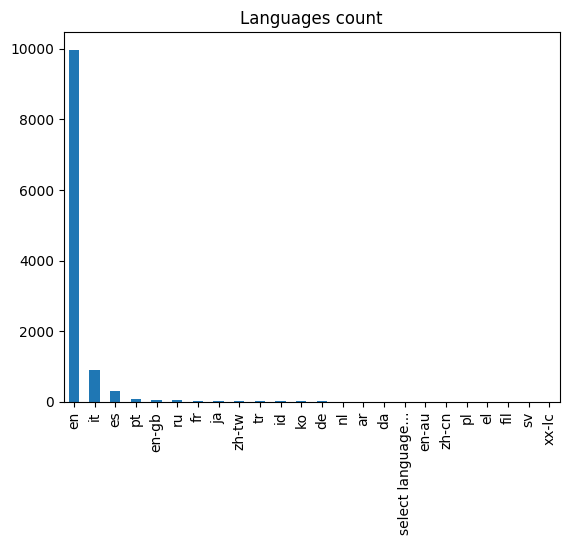

In [23]:
users['lang'] = users['lang'].str.lower()
users['lang'].value_counts().plot(kind='bar', title='Languages count')

users.rename(columns={
    'id' : 'user_id',
    'created_at' : 'subscribing_date'
}, inplace=True)
nal = users[(users['lang'] == 'select language...') | (users['lang'] == 'xx-lc')]

text_nal = tweets.merge(nal, on='user_id')
text_nal

In [24]:
text_nal[text_nal['name'] == 'Leanne Arker']

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text,name,lang,bot,subscribing_date,statuses_count
2484,5.866970e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-12 01:07:12,@bernardchickey I've heard of something called...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2485,5.601363e+17,2.956614e+09,13933.0,0.0,0.0,0.0,0.0,2.0,2020-01-29 18:04:45,RT @stephenfry: If physical diseases were trea...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2486,5.751565e+17,2.956614e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-11 04:49:27,@Hilary_Barry Gives new meaning to the term sl...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2487,NaN,2.956614e+09,9.0,0.0,0.0,NaN,NaN,NaN,2020-03-26 19:04:58,NaN,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2488,5.925147e+17,2.956614e+09,253.0,0.0,0.0,1.0,0.0,1.0,2020-04-28 02:24:59,RT @philipreeve: Help. If you c medal tweet me...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2557,5.939970e+17,2.956614e+09,0.0,0.0,0.0,0.0,1.0,0.0,2020-05-02 04:35:05,I think even super heroes should rest at weeke...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2558,5.939942e+17,2.956614e+09,0.0,0.0,1.0,0.0,1.0,1.0,2020-05-02 04:23:46,Another one for our files @Ruckdie https://t....,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2559,5.811560e+17,2.956614e+09,3.0,0.0,0.0,0.0,0.0,2.0,2020-03-27 18:09:19,RT @laura_macd3: Cartoon Paddy in the Dom Post...,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0
2560,7.268000e+16,2.956614e+09,NaN,0.0,1.0,0.0,NaN,3.0,2020-05-01 19:38:48,@annabf @CampbellLiveNZ @UniteUnion well done,Leanne Arker,select language...,0,2020-01-05 00:09:59,57.0


Visti i tweet tutti so inglesi

In [25]:
users['lang'].replace('select language...', 'en', inplace=True)
users['lang'].replace('xx-lc', 'en', inplace=True)

### Bot Analysis

Check if there are only 0 and 1 values

In [26]:
users.bot.unique()

array([1, 0])

### Statues Count analysis

Calculate for each user how much tweets we have in tweets.csv

In [27]:

count = tweets.groupby('user_id', as_index=False)['user_id'].count()

#cnt['count'] = tweets.groupby(by='user_id', as_index=False, dropna=False)['user_id'].count()
c = users
c.sort_values('user_id')
c['count'] = count
c['statuses_count'].sum() - c['count'].sum()

#max = tweets.groupby('user_id', as_index=False).count()
#max['max'] = max.max(axis=0)
#max

53176053.0

In [28]:
c['count'].median()

152.0

### User's created at analysis (previously we changed the name of the attribute in 'subscribing_date')

In [35]:
users[users['subscribing_date'] > datetime.now()]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


In [38]:
users[users['subscribing_date'] < datetime.strptime("2006-07-15 00:00:00", "%Y-%m-%d %H:%M:%S")]

,user_id,name,lang,bot,subscribing_date,statuses_count,count


Non cene di timestamp sbagliati in italia

### Resulting Plots

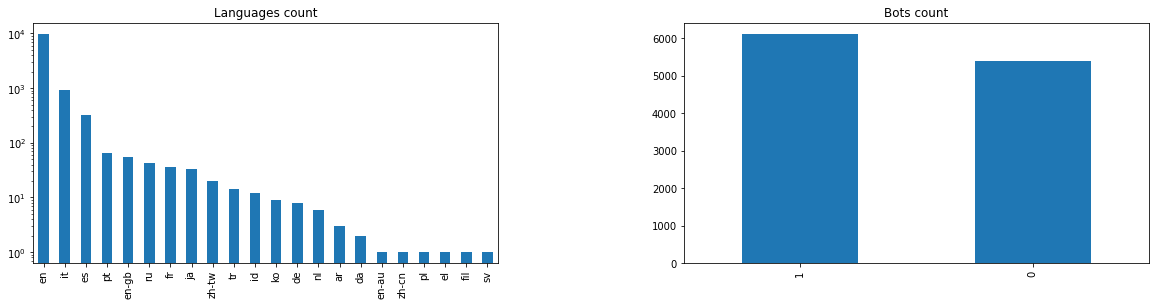

In [ ]:
fig = plt.figure(figsize=(20,23))
fig_dims = (4,2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

###fig 1
plt.subplot2grid(fig_dims, (0,0))
users['lang'].value_counts().plot(kind='bar', title='Languages count')
plt.yscale('log')

###fig 2
plt.subplot2grid(fig_dims, (0,1))
users['bot'].value_counts().plot(kind='bar', title='Bots count')

plt.show()

In [ ]:
#tweets.dropna(inplace=True)

In [ ]:
tweets.drop_duplicates(inplace=True)
#tweets.drop_duplicates(subset=['id'], inplace=True)

In [ ]:
tweets.info()
tweets.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712595 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 983.0+ MB


id                       float64
user_id                  float64
retweet_count            float64
reply_count              float64
favorite_count           float64
num_hashtags             float64
num_urls                 float64
num_mentions             float64
created_at        datetime64[ns]
text                      object
dtype: object

In [ ]:
#aggiungere per ultimi 3 attributi
#eliminazione valori negativi
tweets = tweets[tweets['retweet_count'] >= 0]
tweets = tweets[tweets['reply_count'] >= 0]
tweets = tweets[tweets['favorite_count'] >= 0]
tweets.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10297540 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              float64       
 1   user_id         float64       
 2   retweet_count   float64       
 3   reply_count     float64       
 4   favorite_count  float64       
 5   num_hashtags    float64       
 6   num_urls        float64       
 7   num_mentions    float64       
 8   created_at      datetime64[ns]
 9   text            object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 864.2+ MB


In [ ]:
tweets.sort_values('favorite_count').head(50)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,5.093540e+17,3.277463e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
7980306,2.691764e+17,6.162257e+08,0.0,0.0,0.0,1.0,0.0,0.0,2017-11-17 20:33:55,overcapacity#overcapacity thatsJustStupid haha
7980303,2.974418e+17,1.423570e+07,0.0,0.0,0.0,0.0,1.0,0.0,2018-02-03 20:30:22,Landing in about 30 min (@ Hartsfield-Jackson...
7980302,5.298411e+17,1.950145e+08,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-07 03:42:11,I won't be a rock star. I will be a legend. - ...
7980301,5.858716e+17,3.101627e+09,0.0,0.0,0.0,0.0,0.0,1.0,2020-04-09 18:27:17,@MysidianRabbit hahah it's me Joy ^^ my primar...
7980299,5.548018e+17,2.843210e+08,0.0,0.0,0.0,2.0,1.0,2.0,2020-01-15 00:47:08,3 Challenges Faced by Enterprise SEOs in 2015 ...
7980298,5.931803e+17,2.600379e+08,9.0,0.0,0.0,1.0,0.0,2.0,2020-04-29 22:29:28,RT @wfaachannel8: #BREAKING School bus crash r...
7980297,5.637568e+17,1.324797e+09,0.0,0.0,0.0,1.0,0.0,0.0,2020-02-08 17:51:17,is jinhwan really a 94 liner? He looks like 12...
7980295,5.764310e+17,3.292850e+08,5.0,0.0,0.0,0.0,1.0,1.0,2020-03-14 17:13:48,"RT @JenChancellor: This bigoted, racist shit i..."
7980294,5.166333e+17,5.608727e+08,2.0,0.0,0.0,0.0,0.0,0.0,2019-10-01 16:59:10,"""Essere completamente onesti con se stessi Ã¨ ..."


In [ ]:
tweets['retweet_count'].quantile(0.75) + 1.5*(tweets['retweet_count'].quantile(0.75)-tweets['retweet_count'].quantile(0.25))

2.5

In [ ]:
tweets.replace(to_replace='inf', value=0, inplace=True)
tweets.sort_values('retweet_count', ascending=False)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
1606076,9.613119e+08,2.374871e+09,2.000000e+134,0.0,0.0,NaN,NaN,NaN,2019-07-06 10:54:48,NaN
3841610,1.690871e+16,4.653922e+08,7.000000e+84,0.0,0.0,NaN,0.0,0.0,2019-11-03 22:29:44,La mamma Ã¨ quella che ti insegna a pregare--P...
4727864,7.475156e+08,2.516336e+08,6.000000e+77,0.0,0.0,0.0,0.0,NaN,2020-04-07 06:38:50,RT @AlexDijkstra_: @tapijtlegger @MDMAbleToShi...
12849756,6.684369e+08,2.359389e+09,7.000000e+71,0.0,0.0,0.0,NaN,0.0,2020-04-12 11:31:44,TBH THE ONLY DRAMA WITH A GOOD ENDING
8432312,6.486533e+16,3.929634e+08,4.000000e+65,0.0,0.0,NaN,0.0,1.0,2020-03-02 05:31:18,@tiamojai he's actually sweet as pie to his bm...
...,...,...,...,...,...,...,...,...,...,...
4705968,5.707200e+17,8.762971e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,2020-02-27 23:00:29,http://t.co/srVkJIaBo8
4705967,6.349990e+16,4.890426e+08,0.000000e+00,0.0,1.0,0.0,0.0,1.0,2040-03-12 06:59:19,@juustlikekamii P0RN!!1!1!1!
4705966,5.868563e+17,4.383133e+07,0.000000e+00,0.0,0.0,0.0,0.0,1.0,2020-04-12 11:40:09,@squid_exe sleazy instead of provocative
4705965,4.358238e+17,2.276558e+09,0.000000e+00,0.0,1.0,0.0,0.0,0.0,2019-02-20 17:11:10,"I grandi Dubbi!! PerchÃ¨ si chiama contagocce,..."


In [ ]:
retweet_clean = tweets[tweets['retweet_count'] != 0]['retweet_count']
reply_clean = tweets[tweets['reply_count'] != 0]['reply_count']
favorite_clean = tweets[tweets['favorite_count'] != 0]['favorite_count']
hashtags_clean = tweets[tweets['num_hashtags'] != 0]['num_hashtags']
urls_clean = tweets[tweets['num_urls'] != 0]['num_urls']
mentions_clean = tweets[tweets['num_mentions'] != 0]['num_mentions']

In [ ]:
#retweet_clean.quantile(0.75) + 1.5*(retweet_clean.quantile(0.75)-retweet_clean.quantile(0.25))

In [ ]:
#retweet_clean.median()

In [ ]:
#retweet_clean.plot.box()
#plt.yscale('log')

In [ ]:
#decidere se togliere il valore anomalo 
#retweet_clean = retweet_clean.to_frame()
#retweet_clean2 = retweet_clean[retweet_clean['retweet_count'] < 4000000]['retweet_count']

In [ ]:
#retweet_clean2.quantile(0.75) + 1.5*(retweet_clean2.quantile(0.75)-retweet_clean2.quantile(0.25))

In [ ]:
#retweet_clean2.median()

In [ ]:
#retweet_clean2.plot.box()
#plt.yscale('log')

In [ ]:
#favorite_clean.quantile(0.75) + 1.5*(favorite_clean.quantile(0.75)-favorite_clean.quantile(0.25))

In [ ]:
#decidere se togliere il valore anomalo 
#favorite_clean2 = favorite_clean.to_frame()
#favorite_clean2 = favorite_clean2[favorite_clean2['favorite_count'] < 4000000]['favorite_count']

In [ ]:
favorite_clean2.plot.box()
plt.yscale('log')

In [ ]:
#favorite_clean2.mad(axis = 0, skipna = True)


In [ ]:
#retweet_clean.mad(axis = 0, skipna = True)


In [ ]:
#retweet_clean2.mad(axis = 0, skipna = True)


In [ ]:
#clean = tweets
#clean['retweet_count'] = tweets[tweets['retweet_count'] != 0]['retweet_count']
#clean['retweet_count'] = clean[clean['retweet_count'] < 4000000]['retweet_count']
#clean['reply_count'] = tweets[tweets['reply_count'] != 0]['reply_count']
#clean['favorite_count'] = tweets[tweets['favorite_count'] != 0]['favorite_count']
#clean['favorite_count'] = clean[clean['favorite_count'] < 4000000]['favorite_count']
#clean['num_hashtags'] = tweets[tweets['num_hashtags'] != 0]['num_hashtags']
#clean['num_urls'] = tweets[tweets['num_urls'] != 0]['num_urls']
#clean['num_mentions'] = tweets[tweets['num_mentions'] != 0]['num_mentions']

#clean.info()

In [ ]:
#clean.boxplot(column=['retweet_count', 'reply_count', 'favorite_count'])
#plt.yscale('log')

In [ ]:
#clean['reply_count'].median()

In [ ]:
#clean['reply_count'].quantile(0.75)

In [ ]:
#limit_reply = clean['reply_count'].quantile(0.75) + 1.5*(clean['reply_count'].quantile(0.75)-clean['reply_count'].quantile(0.25))
#clean[(clean['reply_count'] > limit_reply)]['reply_count'].count()

In [ ]:
#limit_retweet = clean['retweet_count'].quantile(0.75) + 1.5*(clean['retweet_count'].quantile(0.75)-clean['retweet_count'].quantile(0.25))
#clean[(clean['retweet_count'] > limit_retweet)]['retweet_count'].count()

In [ ]:
#limit_favorite = clean['favorite_count'].quantile(0.75) + 1.5*(clean['favorite_count'].quantile(0.75)-clean['favorite_count'].quantile(0.25))
#clean[(clean['favorite_count'] > limit_favorite)]['favorite_count'].count()

In [ ]:
user_median = tweets.groupby('user_id').median()

/var/folders/h4/5wp1mt_n1k72n6zcf7wxd6bc0000gn/T/ipykernel_20434/2198640111.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_median = tweets.groupby('user_id').median()


In [ ]:
user_median.sort_values('retweet_count', ascending=False).head(50)


,id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
user_id,,,,,,,
2.704427e+08,2.541554e+17,129468.0,16.0,16.0,1.0,0.0,1.0
1.828710e+05,NaN,58211.0,0.0,0.0,NaN,NaN,NaN
2.430000e+02,7.460479e+10,25626.0,0.0,0.0,NaN,NaN,NaN
2.519938e+08,2.815094e+17,17642.0,19.0,34.0,0.0,1.0,1.0
5.468187e+08,2.886579e+17,14433.0,26.0,22.0,0.0,1.0,1.0
2.563759e+08,2.926623e+17,9669.0,2.0,8.5,0.0,0.5,1.0
6.700000e+01,3.505997e+14,9630.0,0.0,0.0,0.0,NaN,1.0
7.180000e+02,3.516383e+08,8307.0,0.0,0.0,NaN,2.0,1.0
1.418864e+08,3.271155e+17,6782.0,2.0,1.0,0.0,1.0,1.0


In [ ]:
#df = user_median.where(df.isna() & user_median['user_id'] == df['user_id'])

In [ ]:

#user_median['id'] = user_median.index

In [ ]:

df1 = user_median.reset_index()
df1.columns

Index(['user_id', 'id', 'retweet_count', 'reply_count', 'favorite_count',
       'num_hashtags', 'num_urls', 'num_mentions'],
      dtype='object')

In [ ]:

df = tweets.merge(df1, how='left', on='user_id')

In [ ]:
df['retweet_count_x'].isna().count()

10297540

In [ ]:
df['retweet_count_x'].fillna(df['retweet_count_y'][df.index], inplace=True)

In [ ]:
df['retweet_count_x'].isna()

10297540

In [ ]:
user_median['retweet_count'].isna().sum()

0

In [ ]:
df.sort_values('retweet_count_x')
#df['retweet_count_x'].quantile([.25,.5,.75])
tweets['retweet_count'].isna().sum()

0

In [ ]:
wrong = tweets[tweets['num_hashtags'].isna() & tweets['user_id'].notna()]
wrong.head(10)

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
32,NaN,2.214453e+09,1.0,0.0,2.0,NaN,NaN,NaN,2019-01-18 01:13:23,NaN
347,8.669884e+09,1.888349e+09,0.0,0.0,1.0,NaN,0.0,NaN,2020-03-31 01:19:27,SAM SMITH RN
411,NaN,4.662345e+08,0.0,0.0,0.0,NaN,0.0,0.0,2019-11-02 18:16:33,L'aspirina e' un potente anticoncezionale. Bas...
419,NaN,4.663959e+08,0.0,0.0,3.0,NaN,0.0,0.0,2019-08-12 20:07:21,"-Ciao amore, come sto senza trucco? -E TU CHI ..."
517,3.757205e+15,1.970830e+09,0.0,0.0,0.0,NaN,NaN,NaN,2019-06-19 21:55:22,NaN
647,NaN,6.790029e+07,0.0,0.0,0.0,NaN,0.0,1.0,2018-01-24 16:50:29,@JamalLeghari Then Election Or What ??
653,NaN,6.496532e+07,0.0,0.0,1.0,NaN,NaN,NaN,2018-01-31 02:21:28,NaN
712,NaN,3.862418e+08,5.0,0.0,0.0,NaN,NaN,NaN,2020-01-30 04:00:09,NaN
758,6.243894e+17,4.661947e+08,0.0,0.0,0.0,NaN,0.0,0.0,2019-10-31 14:36:46,"""Non Ã¨ facile badare alla convenienza quando ..."
781,4.538975e+17,1.403564e+08,0.0,0.0,0.0,NaN,0.0,1.0,2020-04-02 06:22:01,@AkshayRules kya rate chlre uske aajkl?


In [ ]:
user_median.rename(columns= {'id':'user_id'})
wrong['num_hashtags'] = user_median['num_hashtags'][user_median['user_id'] == wrong['user_id']]

AttributeError: 'DataFrame' object has no attribute 'user_id'